
2.10
The weight and systolic blood pressure of 26 randomly selected males in theage group 25 – 30 are shown below. 
Assume that weight and blood pressure(BP) are jointly normally distributed.

df cols 

   Weight   BP
0     165  130
1     167  133
2     180  150
3     155  128
4     212  151


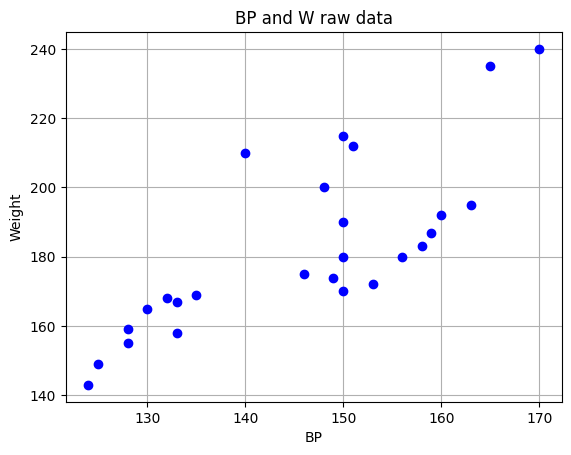

 

 Size of the independent variable: (26,)
Select alpha value (α): 0.05
Your alpha value is (α): 0.05
Enter hypothesis value H0: 0
Your hypothesis is H0: 0.0
t-statistic = 5.978643837487955
p-value = 3.5911051124162114e-06
Slope (w) = 1.426479633679606
Bias (b) = -25.294303581191826
 
a. Find a regression line relating systolic blood pressure to weight.
Regression Line:  y = -25.294303581191826 + 1.426*X
 
 
b. Estimate the correlation coefficient.
Correlation Coeff (R):  0.77349030053055
"R square (Fit)":  0.5982872450148405
 

c. Test the hypothesis that ρ = 0

d. Test the hypothesis that ρ = 0.6

Your hypothesis is H0: 0.0

Reject the H0 hypothesis. There is significant evidence that w is different from 0.0

e. Find a 95% CI for ρ
95.0  percent confidence interval : (1.9178769940406737, 0.9350822733185382)
 

2.11
Consider the weight and blood pressure data in Problem 2.10.
Fit a no -intercept model to the data and compare it to the model obtained in Problem2.10. 
Which model would

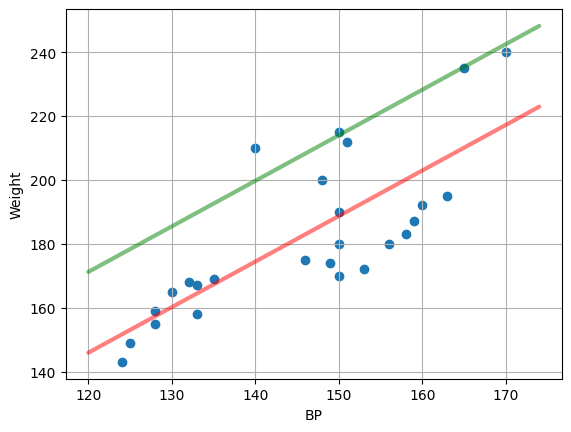

In [9]:
from numpy.ma.core import var
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataframe (df)
url='https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Linear-Reg-Data/2-10-2-11.csv'
df=pd.read_csv(url)

print("\n2.10\nThe weight and systolic blood pressure of 26 randomly selected males in the\
age group 25 – 30 are shown below. \nAssume that weight and blood pressure\
(BP) are jointly normally distributed.\n")

#Select df cols
print("df cols \n")
specific_columns=df[["Weight","BP"]]
print(specific_columns.head())

X = specific_columns['BP']
Y = specific_columns['Weight']

#print the plot of X-Y
plt.plot(X, Y, 'bo')
plt.grid(True)
plt.xlabel('BP')
plt.ylabel('Weight')
plt.title('BP and W raw data')
plt.show()
print(" ")

#Store the sample size (N) 
N = len(X)
print('\n Size of the independent variable: ' + str(X.shape))

# Prompt the user to enter alpha value
alpha = float(input("Select alpha value (α): "))
print("Your alpha value is (α):", alpha)

# Prompt the user to enter a H0 value
H0 = float(input("Enter hypothesis value H0: "))
print("Your hypothesis is H0:", H0)

#Linear Regression Steps
def lin_reg (X, Y):

  #Step2. Calculate the mean of each value using numpy np.mean function
  mean_x = np.mean(X)
  mean_y = np.mean(Y)

  #Step3. Calculate the variance of X-Y using numpy np.var
  var_x = np.var(X)
  var_xy = np.sum((X - mean_x) * (Y - mean_y)) / N

  #Step4. Calculate slope (regression coeff (w))
  w = var_xy / var_x

  #Step5. Calculate bias (b)
  b = mean_y - (w * mean_x)
  
  # Calculate the standard error of w
  se = np.sqrt(np.sum((Y - (w*X + b))**2) / (N - 2)) / np.sqrt(np.sum((X - np.mean(X))**2))

  # Calculate the t-statistic and p-value
  t_stat = (w-H0) / se
  p_val = 2 * t.cdf(-np.abs(t_stat), N-2)

  #Return Linear Regression Formula, 3 decimals rounded
  reg_line = 'y = {} + {}*X'.format(b, round(w, 3))
  
  print("t-statistic = " + str(t_stat))
  print("p-value = " + str(p_val))
  print("Slope (w) = " + str(w))
  print("Bias (b) = " + str(b))    
  
  return (b, w, reg_line, t_stat, p_val, se)

def corr_coeff (X,Y):
  num_corr = (N * (X*Y).sum()) - (X.sum() * Y.sum())
  den_corr = np.sqrt((N * (X**2).sum() - X.sum()**2) * (N * (Y**2).sum() - Y.sum()**2))
  R = num_corr / den_corr
  return R

b, w, reg_line, t_stat, p_val, se = lin_reg(X, Y)
print(" ")
print("a. Find a regression line relating systolic blood pressure to weight.")
print('Regression Line: ', reg_line)
R = corr_coeff(X, Y)
print(" ")
print(" ")
print("b. Estimate the correlation coefficient.")
print('Correlation Coeff (R): ', R)
print('"R square (Fit)": ', R**2)
print(" ")

print("\nc. Test the hypothesis that ρ = 0")
print("\nd. Test the hypothesis that ρ = 0.6")

print("\nYour hypothesis is H0:", H0)
if p_val < alpha:
    print('\nReject the H0 hypothesis. There is significant evidence that w is different from', H0)
else:
    print('\nFail to reject the H0 hypothesis. There is not enough evidence to conclude that w is different from', H0)

def conf_int (se):
  
  # calculate t-value for 95% confidence interval with N-1 degrees of freedom
  t_value = t.ppf(alpha/2, N-1)

  lower_bound = w - (t_value * se)
  upper_bound = w + (t_value * se)
  
  return (lower_bound, upper_bound)

def no_inter_reg (X, Y):

  mean_x = np.mean(X)
  mean_y = np.mean(Y)

  var_x = np.var(X)
  var_xy = np.sum((X - mean_x) * (Y - mean_y)) / N

  #Calculate slope (regression coeff (w)) (β1)
  w = var_xy / var_x
  w = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / np.sum((X - np.mean(X))**2)

  
  # Calculate the standard error of w
  se = np.sqrt(np.sum((Y - (w*X))**2) / (N - 1)) / np.sqrt(np.sum((X - np.mean(X))**2))

  # Calculate the t-statistic and p-value
  no_int_t_stat = (w-H0) / se
  no_int_p_val = 2 * t.cdf(-np.abs(no_int_t_stat), N-1)

  #Return Linear Regression Formula, 3 decimals rounded
  no_int_reg_line = 'y ={}*X'.format(round(w, 3))
  
  print("no_int_t-statistic = " + str(t_stat))
  print("no_int_p-value = " + str(no_int_p_val))
  print("no_int_Slope (w) = " + str(w))
  return (w, no_int_reg_line, no_int_t_stat, no_int_p_val, se)  



print_conf_in = conf_int (se)
print("\ne. Find a 95% CI for ρ")
print( (1-0.05)*100, " percent confidence interval :", print_conf_in)

xs = range(120, 175)
ys = w * xs + b
plt.scatter(X, Y)
plt.plot(xs, ys, c='r', linewidth=3, alpha=.5, solid_capstyle='round')
plt.grid(True)
plt.xlabel("BP")
plt.ylabel("Weight")
print(" ")

print("\n2.11\nConsider the weight and blood pressure data in Problem 2.10.\nFit a no -intercept model to the data and compare it to the model obtained in Problem2.10. \nWhich model would you conclude is superior?\n")

w, no_int_reg_line, no_int_t_stat, no_int_p_val, se = no_inter_reg(X,Y)
print('Regression Line (No Intercept): ', no_int_reg_line)
no_xs = range(120, 175)
no_ys = w * xs
plt.plot(no_xs, no_ys, c='g', linewidth=3, alpha=.5, solid_capstyle='round')
plt.grid(True)
plt.xlabel("BP")
plt.ylabel("Weight")

print("\nReply 2.11:\n Based on the point distribution and the green line (no intercept), the first model seems better fit")